<a href="https://colab.research.google.com/github/Anushka-guptaa/Vision-AI-Image-Classification/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Day-01 Build an ai that sees
#what is image recognition?
# what is deep learning?
# ai ka subset ml and uska subset dl
#what is dataset?
#why preprocessing?
# what is eda(Exploratory Data Analysis)?-visualising the dataset

In [2]:
# OBJECTIVE
# load dataset,pre-process eda, train with pre-trained datasets and then fine tune and then compare also with other datasets
#mnist- modified national institute of standards and technology
# developed by many national institues consisting of various field of computer like in the field of comp. vision- training and testing
# in preprocessing dataset- we have to normalise and reshape the data

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload() # to upload the file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkagupta214","key":"36b58689cdf8e0913bcd696d9c90a4b3"}'}

In [5]:
!mkdir ~/.kaggle # to make a directory .kaggle
!cp kaggle.json ~/.kaggle/ # to move kaggle.json to directory

In [6]:
!chmod 600 ~/.kaggle/kaggle.json # to set permissions of how freq it is going to work upon this
# this is the file permission we need to give to google colab

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path) # dataset imported from mnsit

Path to dataset files: /kaggle/input/mnist-dataset


In [8]:
import tensorflow as tf
# importing the library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # loading the dataset and also allocating the dataset to these values
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}") # printing the shape of train and test


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [9]:
# till now we had loaded the data and everything
# now we are gonna pre process it ie normalise and reshape
x_train = x_train / 255.0 # like we are going to a standard
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("Train reshaped:", x_train.shape)

Train reshaped: (60000, 28, 28, 1)


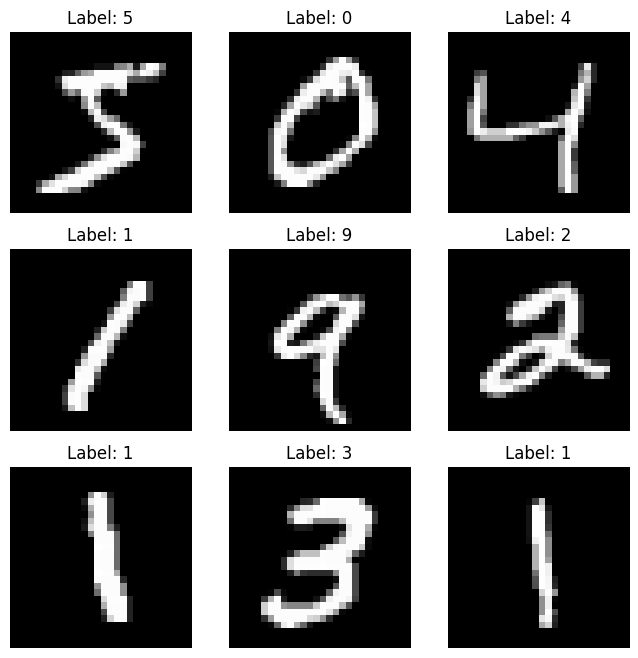

In [10]:
# now we have to do eda techniques
# we have to visualise and understand how it looks like
# so now we are going to import matplotlib used to visualise and plot the data into bars or chart graphs
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # Set the overall figure size , creates a new canvas of size 8*8

for i in range(9):  # Display 9 images in loop
    plt.subplot(3, 3, i + 1)  # divides the figure into a 3 by 3 grid
    #On each iteration, it selects the subplot position where the image will be drawn. i + 1 is used because subplot indices start from 1.
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Show image in grayscale,Each image is reshaped into a 28x28 matrix
    plt.title(f"Label: {y_train[i]}")  # adds a title above each image showing its true label from y_train
    plt.axis('off')  # Hide axes for cleaner look

plt.show()
# it will print and show you how it looks

In [11]:
#  now normalisation by Load CIFAR-10 dataset and then normalise it
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to [0, 1]
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0

# Print shape of training data
print(f"CIFAR-10 Train shape:", x_train_c10.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
CIFAR-10 Train shape: (50000, 32, 32, 3)


In [12]:
#Day 2 we gonna build and train the cnn , going to build the first model of cnn for project
# we are going to build a cnn model using karas to recognise image like digits in mnsit dataset and then train it
# this model will build the code layer by layer
# so first we are importing a special way to build a neural network step by step
from tensorflow.keras.models import Sequential # sequential means layers will be added one after another
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# conv- detects pattern,feature , max- makes images smaller and focus on main part of image, flatten- converts 2d to 1d, dense - after all layers are produced it will connect all of them and make proper prediction
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),# relu means making it faster by keeping only positive values, tells shape of image of size we entered earlier
    MaxPooling2D(2,2),# reduce size and makes it to a 2*2 window
    Conv2D(64, (3,3),activation='relu'), # first 32 then 64 because it is easier then straight jumping to 64
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')# 0-9 so 10 and softmax for turning into probabilites whichever highest prob of prediction will be output
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])# to mark single digits- crossentropy, metric- what to check
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# in the above model has been created
# now we will be training the dataset using our training data which we had loaded earlier
history=model.fit(x_train,y_train, epochs=5, batch_size=32, validation_split=0.2)#model fit will start training process then xtrain - images for training
#ytrain - correct labels, learn to match with them, epochs means training the entire process 5 times too many can also be overfitting so choose reasonable
# the model will learn 32 images at a time , if we go one by one it will take too much time
# validation is one as a whole, 0.2 means keeping 20% data aside as validation data, checks how well the model is learning during training without touching the testing data also
# basically a small test after everyround of training to see how its doing

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8951 - loss: 0.3403 - val_accuracy: 0.9842 - val_loss: 0.0545
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9854 - val_loss: 0.0508
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9854 - val_loss: 0.0538
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9879 - val_loss: 0.0434
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 0.9886 - val_loss: 0.0407


In [14]:
# what is convolutional neural network?
# cnn is made to work with images to automatically learn patterns like edges, shapes.
# cnn does learning layer by layer like first 32 and then 64
# how does a model training work? model learns from the data in training
# why do we use dropout? dropout a trick to make the model more flexible by preventing it from memorising the training data
# to prevent overfitting to prevent performing poorly on unseen data
# how to evaluate a model?
# to test it in new or unseen data
# we have certain methods like what is the accuracy to how much it is predicted
# then we also have a category loss to show much predictions are away from the correct values

In [15]:
# will now plot a graph that show how well the model is like learning during the training
# and how well it performs on validation data after each round

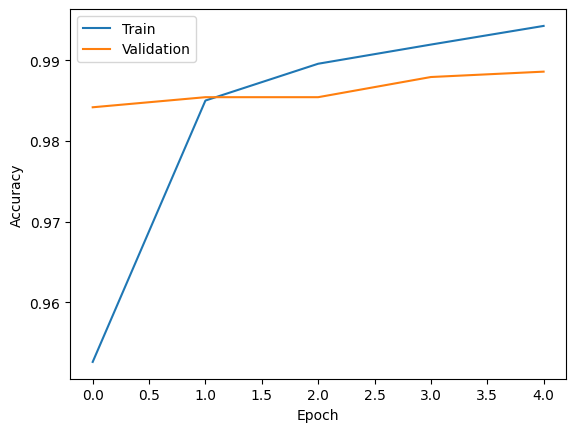

In [16]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# now we will test using new data
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9883 - loss: 0.0387
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [18]:
# now dropout to prevent overfit
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
#Day03
# train more cnn advance with cnn and then we will have a little bit knowledge about data augmentation also like how to expand artifically ur dataset
# and then we will evaluate the advanced metrics also
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#IDG is tool in keras to generate more training images by just like applying random changes to the existing dataset we have

datagen= ImageDataGenerator(
    rotation_range=15, # rotate by 15 degree, rules to create new images
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)# c10= cfier 10

In [20]:
# now deeper in cnn
from tensorflow.keras.layers import BatchNormalization # this imports a special layer that helps us specialise and speed up the whole training model
#batch normalisation help us adjust and scales the activation like reset after every randomisation
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 72ms/step - accuracy: 0.3501 - loss: 1.7700 - val_accuracy: 0.5254 - val_loss: 1.3708
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5325 - loss: 1.3160 - val_accuracy: 0.5566 - val_loss: 1.2540
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.5938 - loss: 1.1644 - val_accuracy: 0.6598 - val_loss: 0.9759
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6229 - loss: 1.0809 - val_accuracy: 0.6307 - val_loss: 1.1461
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 75ms/step - accuracy: 0.6368 - loss: 1.0449 - val_accuracy: 0.6499 - val_loss: 1.0166
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6505 - loss: 0.9980 - val_accuracy: 0.6947 - val_loss: 0.8945
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.6693 - loss: 0.9559 - val_accuracy: 0.6127 - val_loss: 1.1423
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.6770 - lo

In [21]:
#here we are building a more advanced cnn
#now we will train it with smart data

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.91      0.84      0.87      1000
           2       0.64      0.63      0.63      1000
           3       0.61      0.44      0.51      1000
           4       0.74      0.63      0.68      1000
           5       0.62      0.68      0.65      1000
           6       0.81      0.77      0.79      1000
           7       0.67      0.83      0.74      1000
           8       0.83      0.82      0.82      1000
           9       0.72      0.90      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



<function matplotlib.pyplot.show(close=None, block=None)>

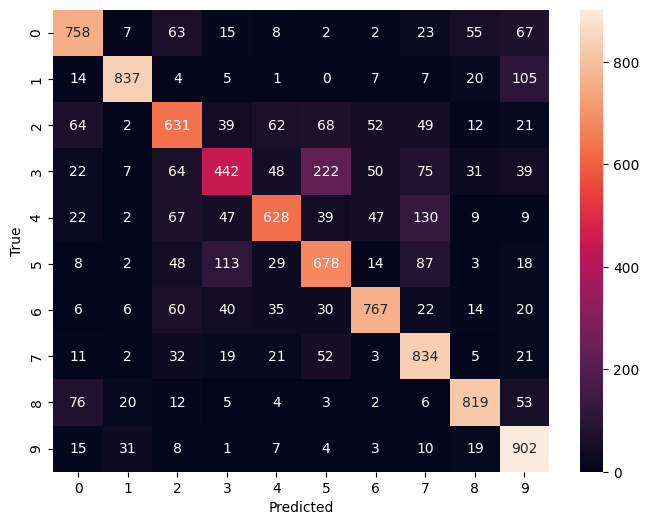

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
#import the tools to analyse the prediction of what we have made
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show
# so in this we r gonna test how well our model did not by just checking if its accurate but also by looking where and hwo it made mistakes

In [26]:
#day 4
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 94% 205M/218M [00:00<00:00, 336MB/s] 
100% 218M/218M [00:00<00:00, 304MB/s]


In [27]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2 )
train_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training')
val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.7788 - loss: 0.5603 - val_accuracy: 0.7985 - val_loss: 0.5129
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.7945 - loss: 0.5021 - val_accuracy: 0.7985 - val_loss: 0.5131
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.7972 - loss: 0.4898 - val_accuracy: 0.7980 - val_loss: 0.5241
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.7952 - loss: 0.4748 - val_accuracy: 0.7975 - val_loss: 0.5246
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.8098 - loss: 0.4381 - val_accuracy: 0.7935 - val_loss: 0.5427


In [34]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),#means it is 0.00001 learning time tiny
              loss='binary_crossentropy',metrics=['accuracy']
              )
#this we will compile again because we have changed which layer are trainable
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1633s 6s/step - accuracy: 0.7941 - loss: 0.4979 - val_accuracy: 0.7950 - val_loss: 0.5363
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1595s 6s/step - accuracy: 0.8103 - loss: 0.4417 - val_accuracy: 0.7950 - val_loss: 0.5387
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1527s 6s/step - accuracy: 0.8140 - loss: 0.4198 - val_accuracy: 0.7910 - val_loss: 0.5409


In [36]:
#save the model which will be generated
#model.save('mobilenet_cats_dogs.h5')# save it into file mobilenet_cats_dogs
# to load it into our system again
#import tensorflow as tf
#loaded_model=tf.keras.models.load_model('mobilet_cats_dogs.h5').... you missed n here so it wasnt working
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')
# the warning means you havent called .compile or .fit  on the loaded model but can still use it for predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step


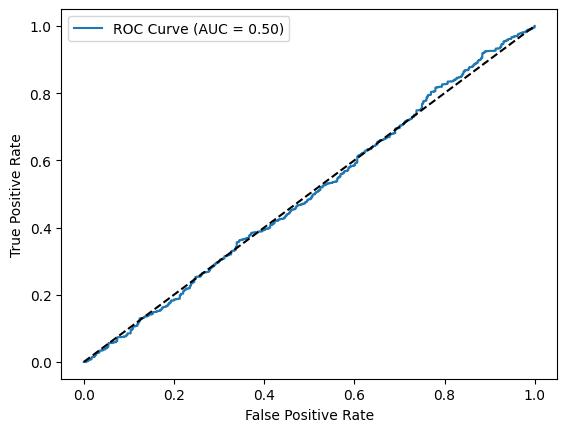

In [44]:
from sklearn.metrics import roc_curve, auc #area under cover
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr, _ = roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')# if above diogonal line then good if on or below then random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
# to see how well it has distinguised between the cats and the dogs
#prob near 0 is cat and near 1 is more likely a dog
#fpr is false positive rate and tpr is true positive rate

In [40]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Replace with your filename after upload
img_path = 'download1.jpg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Prediction
prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")


Saving download1.jpg to download1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Dog


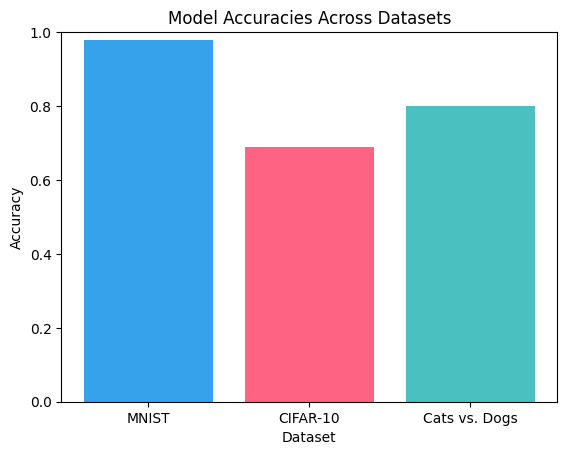

In [41]:
i# now plotting a graph of what accuracies you have meet like model accuracies and all
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies=[0.98, 0.69, 0.80]# values of the last best accuracy
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()